In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df['Gender'].replace(['Female','Male'], [0,1], inplace=True)

In [8]:
df['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [9]:
cat_data=df.select_dtypes(include='object')
cat_data

,Geography
0,France
1,Spain
2,France
3,France
4,Spain
...,...
9995,France
9996,France
9997,France
9998,Germany


In [10]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_data)

OneHotEncoder(handle_unknown='ignore')

In [11]:
ohe_features=ohe.get_feature_names_out(input_features=cat_data.columns)
ohe_features

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [12]:
x_train_cat=pd.DataFrame(ohe.transform(cat_data).toarray(), columns=ohe_features)
x_train_cat.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [13]:
num_data=df.select_dtypes(exclude='object')
data=pd.concat([x_train_cat,num_data],axis=1)
data

,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,619,0,42,2,0.00,1,1,1,101348.88,1
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58,0
2,1.0,0.0,0.0,502,0,42,8,159660.80,3,1,0,113931.57,1
3,1.0,0.0,0.0,699,0,39,1,0.00,2,0,0,93826.63,0
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771,1,39,5,0.00,2,1,0,96270.64,0
9996,1.0,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,1.0,0.0,0.0,709,0,36,7,0.00,1,0,1,42085.58,1
9998,0.0,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52,1


In [14]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report,accuracy_score,f1_score,precision_recall_curve

In [15]:
x=data.drop(columns='Exited')
y=data['Exited']

In [16]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((8000, 12), (2000, 12))

In [17]:
scaled=StandardScaler()
x_train_s= scaled.fit_transform(x_train)

In [18]:
lin_mod=LinearRegression().fit(x_train_s,y_train)
y_pred=lin_mod.predict(x_train_s)

In [19]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0., 0., 0., ..., 0., 0., 1.])

In [20]:
accuracy_score(yhat,y_train)

0.76425

In [21]:
f1_score(yhat,y_train)

0.48777838131450296

In [22]:
x_test_s=scaled.transform(x_test)
y_pred=lin_mod.predict(x_test_s)

In [23]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0., 0., 1., ..., 1., 0., 0.])

In [24]:
accuracy_score(yhat,y_test)

0.7755

In [25]:
f1_score(yhat, y_test)

0.5114254624591947

In [26]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [27]:
rd_mod=RandomForestClassifier().fit(x_train_s,y_train)
y_pred=rd_mod.predict(x_train_s)

In [28]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0, 0, 1, ..., 1, 1, 0])

In [29]:
accuracy_score(yhat,y_train)

1.0

In [30]:
f1_score(yhat,y_train)

1.0

In [31]:
y_pred=rd_mod.predict(x_test_s)
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0, 0, 0, ..., 1, 0, 1])

In [32]:
accuracy_score(yhat,y_test)

0.87

In [33]:
f1_score(yhat,y_test)

0.5899053627760252

In [34]:
gdb=GradientBoostingClassifier().fit(x_train_s, y_train)
y_pred=gdb.predict(x_train_s)
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0, 0, 0, ..., 1, 1, 0])

In [35]:
accuracy_score(yhat, y_pred)

1.0

In [36]:
f1_score(yhat, y_pred)

1.0

In [37]:
y_pred=gdb.predict(x_test_s)
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0, 0, 0, ..., 1, 0, 0])

In [38]:
accuracy_score(yhat, y_test)

0.8645

In [39]:
round(f1_score(yhat,y_test),2)

0.58

In [40]:
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier

In [41]:
xgb=XGBRFClassifier().fit(x_train_s, y_train)
y_pred=xgb.predict(x_train_s)
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0, 0, 0, ..., 1, 0, 1])

In [42]:
round(accuracy_score(yhat,y_train),2)

0.86

In [43]:
round(f1_score(yhat,y_train),2)

0.59

In [44]:
y_pred=xgb.predict(x_test_s)
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
round(accuracy_score(yhat, y_test),2)

0.87

In [46]:
round(f1_score(yhat,y_test),2)

0.59

In [47]:
lgbm=LGBMClassifier().fit(x_train_s, y_train)
y_pred=lgbm.predict(x_train_s)
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267


array([0, 0, 0, ..., 1, 1, 0])

In [48]:
round(accuracy_score(yhat,y_train))

1

In [49]:
round(f1_score(yhat,y_train))

1

In [50]:
y_pred=lgbm.predict(x_test_s)
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0, 0, 0, ..., 1, 0, 0])

In [51]:
round(accuracy_score(yhat,y_test))

1

In [52]:
round(f1_score(yhat,y_test),2)

0.6

In [54]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

In [55]:
model =Sequential([
    Dense(8, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='Adam', 
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_s, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 639us/step - loss: 0.6222 - accuracy: 0.7305
Epoch 2/50
250/250 [==============================] - 0s 604us/step - loss: 0.5691 - accuracy: 0.7849
Epoch 3/50
250/250 [==============================] - 0s 599us/step - loss: 0.5354 - accuracy: 0.7946
Epoch 4/50
250/250 [==============================] - 0s 612us/step - loss: 0.5171 - accuracy: 0.7945
Epoch 5/50
250/250 [==============================] - 0s 601us/step - loss: 0.5083 - accuracy: 0.7945
Epoch 6/50
250/250 [==============================] - 0s 598us/step - loss: 0.5043 - accuracy: 0.7945
Epoch 7/50
250/250 [==============================] - 0s 596us/step - loss: 0.4949 - accuracy: 0.7945
Epoch 8/50
250/250 [==============================] - 0s 598us/step - loss: 0.4894 - accuracy: 0.7945
Epoch 9/50
250/250 [==============================] - 0s 600us/step - loss: 0.4831 - accuracy: 0.7945
Epoch 10/50
250/250 [==============================] - 0s 598us/step - loss: 0.480

In [61]:
y_pred=model.predict(x_train_s)

250/250 [==============================] - 0s 449us/step


In [62]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [63]:
round(accuracy_score(yhat, y_train),2)

0.81

In [64]:
round(f1_score(yhat, y_train),2)

0.57

In [65]:
y_pred=model.predict(x_test_s)

63/63 [==============================] - 0s 491us/step


In [66]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [67]:
y_pred=model.predict(x_test_s)

63/63 [==============================] - 0s 509us/step


In [68]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [69]:
round(accuracy_score(yhat, y_test),2)

0.81

In [70]:
round(f1_score(yhat, y_test),2)

0.57

In [71]:
model =Sequential([
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='Adam', 
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_s, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 0s 611us/step - loss: 0.5063 - accuracy: 0.7874
Epoch 2/50
250/250 [==============================] - 0s 602us/step - loss: 0.4563 - accuracy: 0.7977
Epoch 3/50
250/250 [==============================] - 0s 590us/step - loss: 0.4358 - accuracy: 0.8066
Epoch 4/50
250/250 [==============================] - 0s 590us/step - loss: 0.4237 - accuracy: 0.8104
Epoch 5/50
250/250 [==============================] - 0s 630us/step - loss: 0.4127 - accuracy: 0.8188
Epoch 6/50
250/250 [==============================] - 0s 622us/step - loss: 0.3996 - accuracy: 0.8280
Epoch 7/50
250/250 [==============================] - 0s 656us/step - loss: 0.3864 - accuracy: 0.8359
Epoch 8/50
250/250 [==============================] - 0s 651us/step - loss: 0.3734 - accuracy: 0.8450
Epoch 9/50
250/250 [==============================] - 0s 640us/step - loss: 0.3642 - accuracy: 0.8486
Epoch 10/50
250/250 [==============================] - 0s 627us/step - loss: 0.357

In [72]:
y_pred=model.predict(x_train_s)

250/250 [==============================] - 0s 473us/step


In [73]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [74]:
round(accuracy_score(yhat, y_train),2)

0.84

In [75]:
round(f1_score(yhat, y_train),2)

0.63

In [76]:
y_pred=model.predict(x_test_s)

63/63 [==============================] - 0s 505us/step


In [77]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [78]:
round(accuracy_score(yhat, y_test),2)

0.84

In [79]:
round(f1_score(yhat, y_test),2)

0.61

In [84]:
model =Sequential([
    Dense(8, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='linear')
])

model.compile(optimizer='Adam', 
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(x_train_s, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 0s 648us/step - loss: 0.6567 - accuracy: 0.7623
Epoch 2/50
250/250 [==============================] - 0s 611us/step - loss: 0.5627 - accuracy: 0.7921
Epoch 3/50
250/250 [==============================] - 0s 618us/step - loss: 0.5286 - accuracy: 0.7945
Epoch 4/50
250/250 [==============================] - 0s 614us/step - loss: 0.5190 - accuracy: 0.7943
Epoch 5/50
250/250 [==============================] - 0s 614us/step - loss: 0.5074 - accuracy: 0.7945
Epoch 6/50
250/250 [==============================] - 0s 633us/step - loss: 0.4994 - accuracy: 0.7945
Epoch 7/50
250/250 [==============================] - 0s 613us/step - loss: 0.4947 - accuracy: 0.7945
Epoch 8/50
250/250 [==============================] - 0s 603us/step - loss: 0.4929 - accuracy: 0.7945
Epoch 9/50
250/250 [==============================] - 0s 660us/step - loss: 0.4838 - accuracy: 0.7945
Epoch 10/50
250/250 [==============================] - 0s 613us/step - loss: 0.483

In [85]:
y_pred=model.predict(x_train_s)

250/250 [==============================] - 0s 474us/step


In [86]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [87]:
round(accuracy_score(yhat, y_train),2)

0.79

In [88]:
round(f1_score(yhat,y_train),2)

0.0

In [89]:
y_pred=model.predict(x_test_s)

63/63 [==============================] - 0s 525us/step


In [90]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [92]:
round(accuracy_score(yhat,y_test),2)

0.8

In [93]:
round(f1_score(yhat, y_test),2)

0.0

In [94]:
model =Sequential([
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='Adam', 
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(x_train_s, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 0s 620us/step - loss: 0.5331 - accuracy: 0.7881
Epoch 2/50
250/250 [==============================] - 0s 591us/step - loss: 0.4642 - accuracy: 0.7945
Epoch 3/50
250/250 [==============================] - 0s 589us/step - loss: 0.4479 - accuracy: 0.7951
Epoch 4/50
250/250 [==============================] - 0s 596us/step - loss: 0.4377 - accuracy: 0.8012
Epoch 5/50
250/250 [==============================] - 0s 599us/step - loss: 0.4303 - accuracy: 0.8066
Epoch 6/50
250/250 [==============================] - 0s 665us/step - loss: 0.4246 - accuracy: 0.8110
Epoch 7/50
250/250 [==============================] - 0s 612us/step - loss: 0.4198 - accuracy: 0.8188
Epoch 8/50
250/250 [==============================] - 0s 587us/step - loss: 0.4160 - accuracy: 0.8214
Epoch 9/50
250/250 [==============================] - 0s 590us/step - loss: 0.4124 - accuracy: 0.8242
Epoch 10/50
250/250 [==============================] - 0s 592us/step - loss: 0.409

In [95]:
y_pred=model.predict(x_train_s)

250/250 [==============================] - 0s 464us/step


In [96]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [97]:
round(accuracy_score(yhat, y_train),2)

0.86

In [98]:
round(f1_score(yhat, y_train),2)

0.55

In [99]:
y_pred=model.predict(x_test_s)

63/63 [==============================] - 0s 503us/step


In [100]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [101]:
round(accuracy_score(yhat, y_test),2)

0.85

In [102]:
round(f1_score(yhat, y_test),2)

0.5

# Collecting All the Results saved in a CSV File

In [106]:
data=pd.read_csv('Saved_Data.csv')

In [111]:
data.drop([1],inplace=True)

In [113]:
data.columns=['Model Name', 'Training Accuracy','Training F1 Score', 'Testing Accuracy', 'Testing F1 Score']

In [115]:
data.drop([0], inplace=True)

In [118]:
data

,Model Name,Training Accuracy,Training F1 Score,Testing Accuracy,Testing F1 Score
2,Linear Regression,0.76425,0.487,0.7755,0.5114
3,Random Forest,1,1,0.87,0.589
4,Gradient Boosting,1,1,0.8645,0.58
5,XGBoost,0.86,0.59,0.87,0.59
6,LGBM,1,1,1,0.6
7,TF with Dropout,0.81,0.57,0.81,0.57
8,TF without Dropout,0.84,0.63,0.84,0.61
9,TF with Dropout with Logits,0.79,0,0.8,0
10,TF with Logits,0.86,0.55,0.85,0.5


In [119]:
data.index=data['Model Name']

In [121]:
data.drop(columns=['Model Name'], axis=1, inplace=True)

In [122]:
data

,Training Accuracy,Training F1 Score,Testing Accuracy,Testing F1 Score
Model Name,,,,
Linear Regression,0.76425,0.487,0.7755,0.5114
Random Forest,1,1,0.87,0.589
Gradient Boosting,1,1,0.8645,0.58
XGBoost,0.86,0.59,0.87,0.59
LGBM,1,1,1,0.6
TF with Dropout,0.81,0.57,0.81,0.57
TF without Dropout,0.84,0.63,0.84,0.61
TF with Dropout with Logits,0.79,0,0.8,0
TF with Logits,0.86,0.55,0.85,0.5


In [125]:
import seaborn as sns

In [173]:
data['Training Accuracy']=data['Training Accuracy'].astype('float')
data['Training F1 Score']=data['Training F1 Score'].astype('float')
data['Testing Accuracy']=data['Testing Accuracy'].astype('float')
data['Testing F1 Score']=data['Testing F1 Score'].astype('float')

In [174]:
data.dtypes

Training Accuracy    float64
Training F1 Score    float64
Testing Accuracy     float64
Testing F1 Score     float64
dtype: object

<AxesSubplot: xlabel='Model Name'>

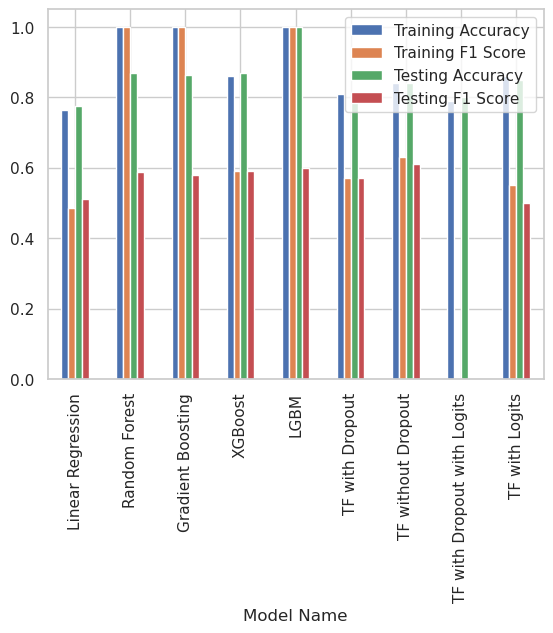

In [181]:
data.plot(kind='bar')